In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import joblib
import pickle

{'status': 'ok', 'totalResults': 14362, 'articles': [{'source': {'id': None, 'name': 'Ted.com'}, 'author': 'Anathea Chino, contact@ted.com (TED)', 'title': 'The power shift US politics needs | Anathea Chino', 'description': 'As the cofounder of Advance Native Political Leadership, Anathea Chino creates space for Native American leaders to thrive in an often unwelcoming political system. Alongside comedian and filmmaker Negin Farsad, she discusses the power of diverse identities i…', 'url': 'https://www.ted.com/talks/anathea_chino_the_power_shift_us_politics_needs', 'urlToImage': 'https://pi.tedcdn.com/r/talkstar-assets.s3.amazonaws.com/production/talks/talk_145748/bfd7ebaa-a34d-477c-82fe-2338a6cf3500/AnatheaChino_2024N-embed.jpg?u%5Br%5D=2&u%5Bs%5D=0.5&u%5Ba%5D=0.8&u%5Bt%5D=0.03&quality=82c=1050%2C550&w=1050', 'publishedAt': '2025-02-11T15:59:41Z', 'content': 'TED is supported by ads and partners00:00'}, {'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Verge Press Room',

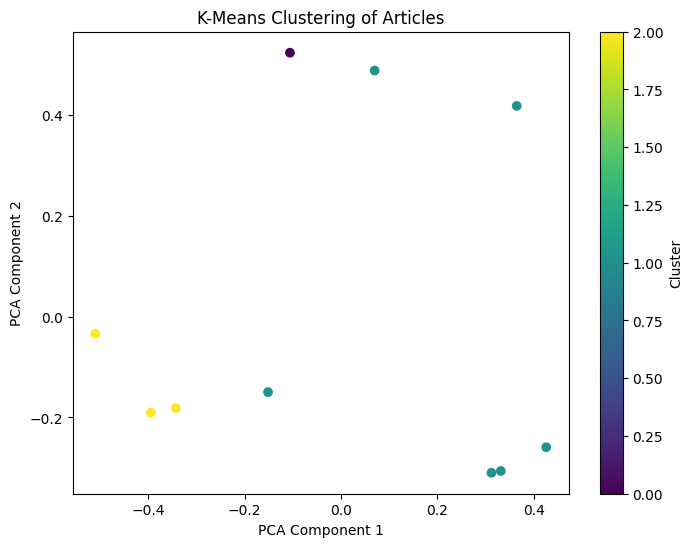

In [9]:
%run 'data_collection.ipynb'
%run 'feature_extraction.ipynb'


In [10]:
articles_clean = [article for article in articles if article['description']]
texts = [article['description'] for article in articles_clean]
processed_texts = [preprocess_text_spacy(text) for text in texts]


In [11]:
X = X_df.values

In [12]:
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(X)

cluster_predictions = kmeans.predict(X)
for idx, article in enumerate(articles_clean):
    print(f"Title: {article['title']}, Cluster: {cluster_predictions[idx]}")


Title: FTC Chair praises Justice Thomas as ‘the most important judge of the last 100 years’ for Black History Month, Cluster: 2
Title: 16 minutes, Cluster: 1
Title: AI Will Save Dating Apps. Or Maybe Finally Kill Them, Cluster: 1
Title: 'Sad day for tennis' - Sinner doping ban 'leaves sour taste', Cluster: 0
Title: ChatGPT’s Political Views Are Shifting Right, a New Analysis Finds, Cluster: 1
Title: iPhone voice recognition controversy: 'Racist' converts to 'Trump', Cluster: 1
Title: Saturday Night Live Played the Wrong Greatest-Hits Reel, Cluster: 1
Title: Why Does Integer Addition Approximate Float Multiplication?, Cluster: 1
Title: Trump Evicts Moon Rock From Oval Office, Returns It to NASA, Cluster: 2
Title: DeepSeek AI draws ire of spy agency over data hoarding and hot bias, Cluster: 2


In [13]:
score = silhouette_score(X, cluster_predictions)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.005573105551184558
